In [1]:
# import library
from collections import defaultdict
import random
import numpy as np


random.seed(10)

# Set a percentage for threshold to determine whether the itemset is frequent or not
# for example, if the threshold percentage is 1% (0.01), and the data size is 3000
# that means when the itemset exist 30 times or more, than it will be classified as frequent
global threshold_percent
threshold_percent = 0.01


In [2]:
# read data
with open('T10I4D100K.dat.txt') as T10I4D100K:
    T10I4D100K_lines = T10I4D100K.readlines()
T10I4D100K.close()

with open('T10I4D100K.dat.txt') as T40I10D100K:
    T40I10D100K_lines = T40I10D100K.readlines()
T40I10D100K.close()

with open('chess.dat.txt') as chess:
    chess_lines = chess.readlines()
chess.close()

with open('connect.dat') as connect:
    connect_lines = connect.readlines()
connect.close()

with open('mushroom.dat.txt') as mushroom:
    mushroom_lines = mushroom.readlines()
mushroom.close()

with open('pumsb.dat.txt') as pumsb:
    pumsb_lines = pumsb.readlines()
pumsb.close()

with open('pumsb_star.dat.txt') as pumsb_star:
    pumsb_star_lines = pumsb_star.readlines()
pumsb_star.close()

In [3]:
def simple_algo(data, sample_size):
    
    item_counts = defaultdict(int)
    pair_counts = defaultdict(int)
    assoication_rules = {}
    
    # Choose random samples from the whole set
    whole_set_size = len(data)
    randomlist = random.sample(range(0,whole_set_size), int(np.ceil(whole_set_size*sample_size-0)))
    sample = list(data[i] for i in randomlist)

    # first pass
    THRESHOLD = int(np.ceil(whole_set_size * threshold_percent * sample_size))

    # find canidate items
    for line in sample:
        for item in line.split():
            item_counts[item]+=1


    # filter for frequent items
    frequent_items = set()
    for key in item_counts:
        if item_counts[key] > THRESHOLD:
            frequent_items.add(key)


    # second pass
    # get counts of candidate pairs
    for line in sample:
        items = line.split()
        for idx_1 in range(len(items)-1):
            if items[idx_1] not in frequent_items:
                continue
            for idx_2 in range(idx_1 + 1, len(items)):
                if items[idx_2] not in frequent_items:
                    continue
                pair = (items[idx_1], items[idx_2])
                pair_counts[pair]+=1
                

    # get frequent pairs
    frequent_pairs = []
    for key in pair_counts:
        if pair_counts[key]>THRESHOLD:
            frequent_pairs.append(key)
    return frequent_pairs
    
    # assoication rules and confidence
    for i in range(len(frequent_pairs)):
        assoication_rules[frequent_pairs[i][0] + ' -> ' + frequent_pairs[i][1]] = np.round(pair_counts[(frequent_pairs[i][0], frequent_pairs[i][1])]/item_counts[frequent_pairs[i][0]],3)
        assoication_rules[frequent_pairs[i][1] + ' -> ' + frequent_pairs[i][0]] = np.round(pair_counts[(frequent_pairs[i][0], frequent_pairs[i][1])]/item_counts[frequent_pairs[i][1]],3)
    # return assoication_rules
        
    

In [4]:
def SON_apriori(data):
    
    item_counts = defaultdict(int)
    pair_counts = defaultdict(int)
    assoication_rules = {}
    

    # first pass
    whole_set_size = len(data)
    THRESHOLD = int(np.ceil(whole_set_size * threshold_percent))

    # find canidate items
    for line in data:
        for item in line.split():
            item_counts[item]+=1

    # filter for frequent items
    frequent_items = set()
    for key in item_counts:
        if item_counts[key] > THRESHOLD:
            frequent_items.add(key)


    # second pass
    # get counts of candidate pairs
    for line in data:
        items = line.split()
        for idx_1 in range(len(items)-1):
            if items[idx_1] not in frequent_items:
                continue
            for idx_2 in range(idx_1 + 1, len(items)):
                if items[idx_2] not in frequent_items:
                    continue
                pair = (items[idx_1], items[idx_2])
                pair_counts[pair]+=1
    return pair_counts

    # get frequent pairs dictionary
    frequent_pairs_dict = {}
    for key in pair_counts:
        frequent_pairs_dict[key] = frequent_pairs_dict.get(key,0) + 1 
    # return frequent_pairs_dict
    
    # assoication rules and confidence
    for i in range(len(frequent_pairs)):
        assoication_rules[frequent_pairs[i][0] + ' -> ' + frequent_pairs[i][1]] = np.round(pair_counts[(frequent_pairs[i][0], frequent_pairs[i][1])]/item_counts[frequent_pairs[i][0]],3)
        assoication_rules[frequent_pairs[i][1] + ' -> ' + frequent_pairs[i][0]] = np.round(pair_counts[(frequent_pairs[i][0], frequent_pairs[i][1])]/item_counts[frequent_pairs[i][1]],3)
    # return assoication_rules
        
    

In [5]:
def split(list_a, no_of_chunk):
    chunk_size = int(len(list_a)/no_of_chunk)+1
    for i in range(0, len(list_a), chunk_size):
        yield list_a[i:i + chunk_size]

In [6]:
# SON Algorithm (divide into 10 chunks)
def SON(data, no_of_chunk):
        
    chunk_list = []
    tmp_list = []
    union_frequent_itemset = []
    final_frequent_itemset = []
    candidate_itemset_dict = {}
    frequent_itemset_dict = {}
    split_data = list(split(data, no_of_chunk))
    
    whole_set_size = len(data)
    THERSHOLD = int(np.ceil(whole_set_size * threshold_percent))
    chunk_THRESHOLD = int(np.ceil(whole_set_size * threshold_percent)/no_of_chunk)
    
    
    # First Pass
    
    # find itemset for each chunk
    for i in range(0, no_of_chunk):
        chunk_list.append(SON_apriori(split_data[i]))
    
    tmp_list = chunk_list   # Initialize the list 
    
    # filter for frequent itemset (remove itemset if its value is lower than threshold)
    for i in range(0,len(tmp_list)):
        tmp_list[i] = dict((k,v) for k,v in chunk_list[i].items() if v>=chunk_THRESHOLD)
    
    # Union all local frequent itemset (convert all dictionary in tmp_list to list first)
    for i in range(0, len(chunk_list)):
        union_frequent_itemset += tmp_list[i].keys()
    
    
    
    # Second Pass
    
    frequent_itemset_dict = {i:0 for i in union_frequent_itemset}
    # count all the candidate itemset from all chunk dictionaries
    for i in frequent_itemset_dict.keys():
        for j in range(0, no_of_chunk):
            frequent_itemset_dict[i] += chunk_list[j].get(i,0)
   
    # Remove false positive
    frequent_itemset_dict = {k:v for k,v in frequent_itemset_dict.items() if v >= THERSHOLD}
    return list(frequent_itemset_dict.keys())
    


In [7]:
def Jaccard_similarity(list1, list2):
    ans = np.round(len(set(list1) & set(list2)) / float(len(set(list1) | set(list2))) * 100,3)
    return ans

In [8]:
T10I4D100K_1percent= simple_algo(T10I4D100K_lines, 0.01)
T40I10D100K_1percent= simple_algo(T40I10D100K_lines, 0.01)
chess_1percent= simple_algo(chess_lines, 0.01)
connect_1percent= simple_algo(connect_lines, 0.01)
mushroom_1percent= simple_algo(mushroom_lines, 0.01)
pumsb_1percent= simple_algo(pumsb_lines, 0.01)
pumsb_star_1percent= simple_algo(pumsb_star_lines, 0.01)

In [9]:
T10I4D100K_2percent= simple_algo(T10I4D100K_lines, 0.02)
T40I10D100K_2percent= simple_algo(T40I10D100K_lines, 0.02)
chess_2percent= simple_algo(chess_lines, 0.02)
connect_2percent= simple_algo(connect_lines, 0.02)
mushroom_2percent= simple_algo(mushroom_lines, 0.02)
pumsb_2percent= simple_algo(pumsb_lines, 0.02)
pumsb_star_2percent= simple_algo(pumsb_star_lines, 0.02)

In [10]:
T10I4D100K_5percent= simple_algo(T10I4D100K_lines, 0.05)
T40I10D100K_5percent= simple_algo(T40I10D100K_lines, 0.05)
chess_5percent= simple_algo(chess_lines, 0.05)
connect_5percent= simple_algo(connect_lines, 0.05)
mushroom_5percent= simple_algo(mushroom_lines, 0.05)
pumsb_5percent= simple_algo(pumsb_lines, 0.05)
pumsb_star_5percent= simple_algo(pumsb_star_lines, 0.05)

In [11]:
T10I4D100K_10percent= simple_algo(T10I4D100K_lines, 0.1)
T40I10D100K_10percent= simple_algo(T40I10D100K_lines, 0.1)
chess_10percent= simple_algo(chess_lines, 0.1)
connect_10percent= simple_algo(connect_lines, 0.1)
mushroom_10percent= simple_algo(mushroom_lines, 0.1)
pumsb_10percent= simple_algo(pumsb_lines, 0.1)
pumsb_star_10percent= simple_algo(pumsb_star_lines, 0.1)

In [12]:
T10I4D100K_SON= SON(T10I4D100K_lines, 10)
T40I10D100K_SON= SON(T40I10D100K_lines, 10)
chess_SON= SON(chess_lines, 10)
connect_SON= SON(connect_lines, 10)
mushroom_SON= SON(mushroom_lines, 10)
pumsb_SON= SON(pumsb_lines, 10)
pumsb_star_SON= SON(pumsb_star_lines, 10)

# Compare the result from simple, random algorithm and SON algorithm

## Jaccard Similarity among 5 results for each dataset and number of frequent itemsets

### T10I4D100K

In [13]:
T10I4D100K_list = [T10I4D100K_1percent,T10I4D100K_2percent,T10I4D100K_5percent,T10I4D100K_10percent,T10I4D100K_SON]
T10I4D100K_list_size = [len(T10I4D100K_1percent),len(T10I4D100K_2percent),len(T10I4D100K_5percent),len(T10I4D100K_10percent),len(T10I4D100K_SON)]
T10I4D100K_similarity_matrix = np.zeros((5,5))

for i in range(0, 5):
    for j in range(0, 5):
            T10I4D100K_similarity_matrix[i][j]= Jaccard_similarity(T10I4D100K_list[i],T10I4D100K_list[j])

T10I4D100K_similarity_matrix


array([[100.   ,  17.5  ,  25.926,  23.077,  17.391],
       [ 17.5  , 100.   ,  15.625,  20.69 ,  15.385],
       [ 25.926,  15.625, 100.   ,  69.231,  41.667],
       [ 23.077,  20.69 ,  69.231, 100.   ,  50.   ],
       [ 17.391,  15.385,  41.667,  50.   , 100.   ]])

In [14]:
T10I4D100K_list_size

[22, 25, 12, 10, 5]

In [15]:
# line graph for similarity between results of simple, random algorithm (1%/2%/5%/10%) and SON algorithm

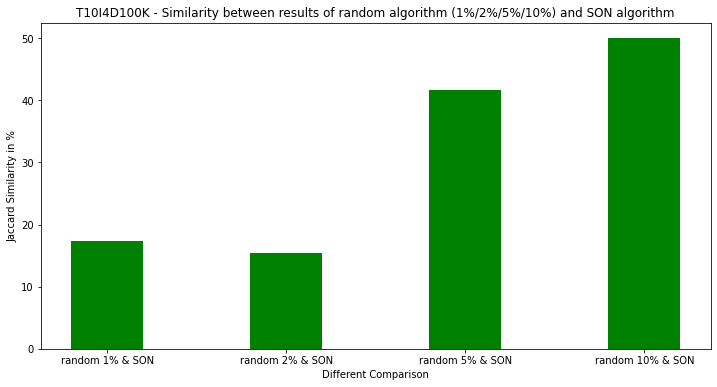

In [16]:
import matplotlib.pyplot as plt
text_processing = ['random 1% & SON', 'random 2% & SON', 'random 5% & SON', 'random 10% & SON']
values = [T10I4D100K_similarity_matrix[0][4], T10I4D100K_similarity_matrix[1][4], T10I4D100K_similarity_matrix[2][4], T10I4D100K_similarity_matrix[3][4]]


fig = plt.figure(figsize = (12, 6))
 
# Create the bar plot
plt.bar(text_processing, values, color ='green',
        width = 0.4)

plt.xlabel("Different Comparison")
plt.ylabel("Jaccard Similarity in %")
plt.title("T10I4D100K - Similarity between results of random algorithm (1%/2%/5%/10%) and SON algorithm")
plt.show()

### T40I10D100K

In [17]:
T40I10D100K_list = [T40I10D100K_1percent,T40I10D100K_2percent,T40I10D100K_5percent,T40I10D100K_10percent,T40I10D100K_SON]
T40I10D100K_list_size = [len(T40I10D100K_1percent),len(T40I10D100K_2percent),len(T40I10D100K_5percent),len(T40I10D100K_10percent),len(T40I10D100K_SON)]
T40I10D100K_similarity_matrix = np.zeros((5,5))

for i in range(0, 5):
    for j in range(0, 5):
            T40I10D100K_similarity_matrix[i][j]= Jaccard_similarity(T40I10D100K_list[i],T40I10D100K_list[j])

T40I10D100K_similarity_matrix

array([[100.   ,  29.73 ,  15.625,  13.793,  16.667],
       [ 29.73 , 100.   ,  21.875,  25.   ,  20.   ],
       [ 15.625,  21.875, 100.   ,  60.   ,  35.714],
       [ 13.793,  25.   ,  60.   , 100.   ,  50.   ],
       [ 16.667,  20.   ,  35.714,  50.   , 100.   ]])

In [18]:
T40I10D100K_list_size

[23, 25, 14, 10, 5]

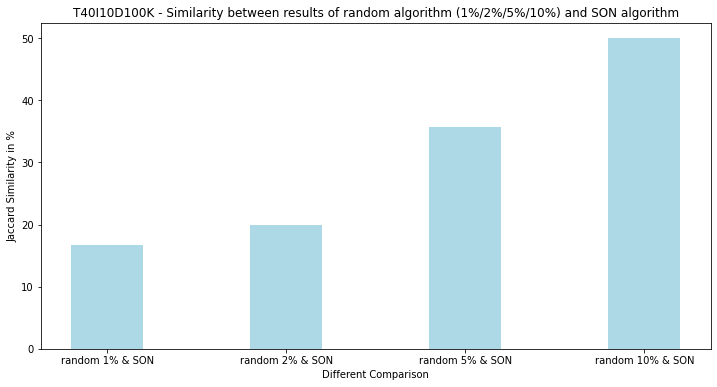

In [19]:
text_processing = ['random 1% & SON', 'random 2% & SON', 'random 5% & SON', 'random 10% & SON']
values = [T40I10D100K_similarity_matrix[0][4], T40I10D100K_similarity_matrix[1][4], T40I10D100K_similarity_matrix[2][4], T40I10D100K_similarity_matrix[3][4]]


fig = plt.figure(figsize = (12, 6))
 
# Create the bar plot
plt.bar(text_processing, values, color ='lightblue',
        width = 0.4)

plt.xlabel("Different Comparison")
plt.ylabel("Jaccard Similarity in %")
plt.title("T40I10D100K - Similarity between results of random algorithm (1%/2%/5%/10%) and SON algorithm")
plt.show()

### chess

In [20]:
chess_list = [chess_1percent,chess_2percent,chess_5percent,chess_10percent,chess_SON]
chess_list_size = [len(chess_1percent),len(chess_2percent),len(chess_5percent),len(chess_10percent),len(chess_SON)]
chess_similarity_matrix = np.zeros((5,5))

for i in range(0, 5):
    for j in range(0, 5):
            chess_similarity_matrix[i][j]= Jaccard_similarity(chess_list[i],chess_list[j])

chess_similarity_matrix

array([[100.   ,  82.821,  86.252,  84.801,  82.985],
       [ 82.821, 100.   ,  88.894,  86.866,  87.31 ],
       [ 86.252,  88.894, 100.   ,  93.943,  94.467],
       [ 84.801,  86.866,  93.943, 100.   ,  96.28 ],
       [ 82.985,  87.31 ,  94.467,  96.28 , 100.   ]])

In [21]:
chess_list_size

[1868, 2059, 2142, 2181, 2251]

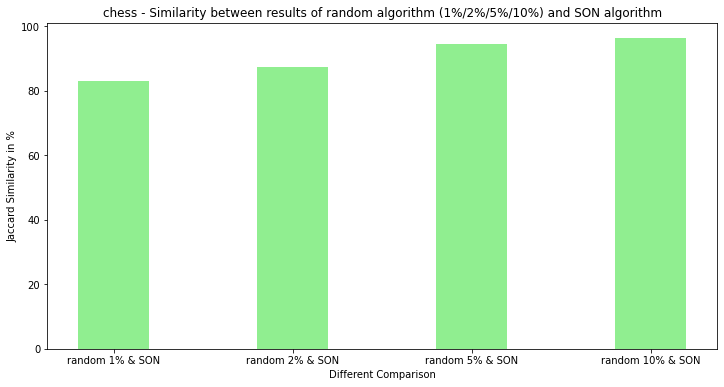

In [22]:
text_processing = ['random 1% & SON', 'random 2% & SON', 'random 5% & SON', 'random 10% & SON']
values = [chess_similarity_matrix[0][4], chess_similarity_matrix[1][4], chess_similarity_matrix[2][4], chess_similarity_matrix[3][4]]


fig = plt.figure(figsize = (12, 6))
 
# Create the bar plot
plt.bar(text_processing, values, color ='lightgreen',
        width = 0.4)

plt.xlabel("Different Comparison")
plt.ylabel("Jaccard Similarity in %")
plt.title("chess - Similarity between results of random algorithm (1%/2%/5%/10%) and SON algorithm")
plt.show()

### connect

In [23]:
connect_list = [connect_1percent,connect_2percent,connect_5percent,connect_10percent,connect_SON]
connect_list_size = [len(connect_1percent),len(connect_2percent),len(connect_5percent),len(connect_10percent),len(connect_SON)]
connect_similarity_matrix = np.zeros((5,5))

for i in range(0, 5):
    for j in range(0, 5):
            connect_similarity_matrix[i][j]= Jaccard_similarity(connect_list[i],connect_list[j])

connect_similarity_matrix

array([[100.   ,  92.714,  93.556,  92.893,  93.507],
       [ 92.714, 100.   ,  95.876,  95.211,  95.137],
       [ 93.556,  95.876, 100.   ,  96.874,  95.584],
       [ 92.893,  95.211,  96.874, 100.   ,  96.516],
       [ 93.507,  95.137,  95.584,  96.516, 100.   ]])

In [24]:
connect_list_size

[4147, 4238, 4263, 4240, 4108]

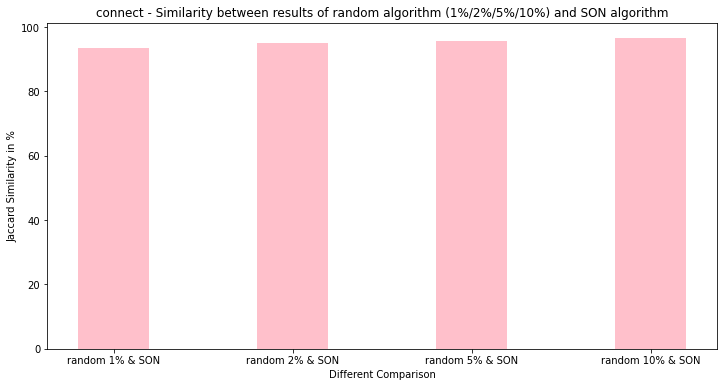

In [25]:
text_processing = ['random 1% & SON', 'random 2% & SON', 'random 5% & SON', 'random 10% & SON']
values = [connect_similarity_matrix[0][4], connect_similarity_matrix[1][4], connect_similarity_matrix[2][4], connect_similarity_matrix[3][4]]


fig = plt.figure(figsize = (12, 6))
 
# Create the bar plot
plt.bar(text_processing, values, color ='pink',
        width = 0.4)

plt.xlabel("Different Comparison")
plt.ylabel("Jaccard Similarity in %")
plt.title("connect - Similarity between results of random algorithm (1%/2%/5%/10%) and SON algorithm")
plt.show()

### mushroom

In [26]:
mushroom_list = [mushroom_1percent,mushroom_2percent,mushroom_5percent,mushroom_10percent,mushroom_SON]
mushroom_list_size = [len(mushroom_1percent),len(mushroom_2percent),len(mushroom_5percent),len(mushroom_10percent),len(mushroom_SON)]
mushroom_similarity_matrix = np.zeros((5,5))

for i in range(0, 5):
    for j in range(0, 5):
            mushroom_similarity_matrix[i][j]= Jaccard_similarity(mushroom_list[i],mushroom_list[j])

mushroom_similarity_matrix

array([[100.   ,  74.744,  77.148,  78.252,  74.969],
       [ 74.744, 100.   ,  85.471,  85.89 ,  86.651],
       [ 77.148,  85.471, 100.   ,  90.177,  90.312],
       [ 78.252,  85.89 ,  90.177, 100.   ,  92.132],
       [ 74.969,  86.651,  90.312,  92.132, 100.   ]])

In [27]:
mushroom_list_size

[1845, 2251, 2217, 2294, 2419]

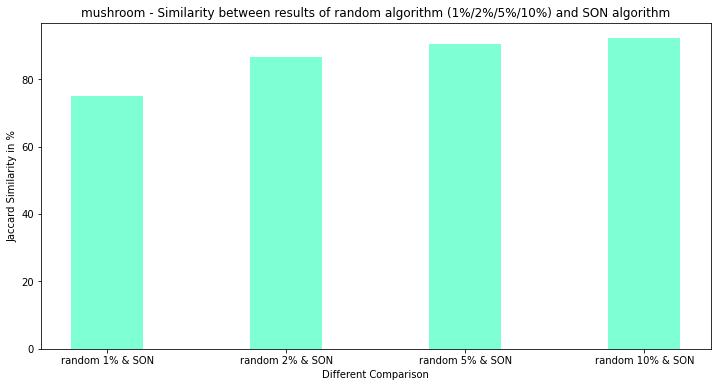

In [28]:
text_processing = ['random 1% & SON', 'random 2% & SON', 'random 5% & SON', 'random 10% & SON']
values = [mushroom_similarity_matrix[0][4], mushroom_similarity_matrix[1][4], mushroom_similarity_matrix[2][4], mushroom_similarity_matrix[3][4]]


fig = plt.figure(figsize = (12, 6))
 
# Create the bar plot
plt.bar(text_processing, values, color ='aquamarine',
        width = 0.4)

plt.xlabel("Different Comparison")
plt.ylabel("Jaccard Similarity in %")
plt.title("mushroom - Similarity between results of random algorithm (1%/2%/5%/10%) and SON algorithm")
plt.show()

### pumsb

In [29]:
pumsb_list = [pumsb_1percent,pumsb_2percent,pumsb_5percent,pumsb_10percent,pumsb_SON]
pumsb_list_size = [len(pumsb_1percent),len(pumsb_2percent),len(pumsb_5percent),len(pumsb_10percent),len(pumsb_SON)]
pumsb_similarity_matrix = np.zeros((5,5))

for i in range(0, 5):
    for j in range(0, 5):
            pumsb_similarity_matrix[i][j]= Jaccard_similarity(pumsb_list[i],pumsb_list[j])

pumsb_similarity_matrix

array([[100.   ,  76.486,  79.506,  80.38 ,  80.021],
       [ 76.486, 100.   ,  83.361,  84.945,  84.829],
       [ 79.506,  83.361, 100.   ,  89.742,  87.933],
       [ 80.38 ,  84.945,  89.742, 100.   ,  88.367],
       [ 80.021,  84.829,  87.933,  88.367, 100.   ]])

In [30]:
pumsb_list_size

[22749, 22855, 23174, 23385, 20870]

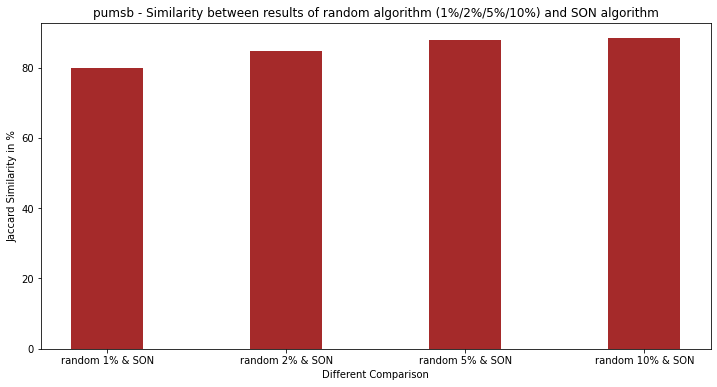

In [31]:
text_processing = ['random 1% & SON', 'random 2% & SON', 'random 5% & SON', 'random 10% & SON']
values = [pumsb_similarity_matrix[0][4], pumsb_similarity_matrix[1][4], pumsb_similarity_matrix[2][4], pumsb_similarity_matrix[3][4]]


fig = plt.figure(figsize = (12, 6))
 
# Create the bar plot
plt.bar(text_processing, values, color ='brown',
        width = 0.4)

plt.xlabel("Different Comparison")
plt.ylabel("Jaccard Similarity in %")
plt.title("pumsb - Similarity between results of random algorithm (1%/2%/5%/10%) and SON algorithm")
plt.show()

### pumsb_star

In [32]:
pumsb_star_list = [pumsb_star_1percent,pumsb_star_2percent,pumsb_star_5percent,pumsb_star_10percent,pumsb_star_SON]
pumsb_star_list_size = [len(pumsb_star_1percent),len(pumsb_star_2percent),len(pumsb_star_5percent),len(pumsb_star_10percent),len(pumsb_star_SON)]
pumsb_star_similarity_matrix = np.zeros((5,5))

for i in range(0, 5):
    for j in range(0, 5):
            pumsb_star_similarity_matrix[i][j]= Jaccard_similarity(pumsb_star_list[i],pumsb_star_list[j])

pumsb_star_similarity_matrix

array([[100.   ,  74.058,  75.507,  76.952,  76.532],
       [ 74.058, 100.   ,  82.132,  83.976,  82.66 ],
       [ 75.507,  82.132, 100.   ,  87.168,  85.857],
       [ 76.952,  83.976,  87.168, 100.   ,  87.83 ],
       [ 76.532,  82.66 ,  85.857,  87.83 , 100.   ]])

In [33]:
pumsb_star_list_size

[14699, 14534, 14465, 14606, 12960]

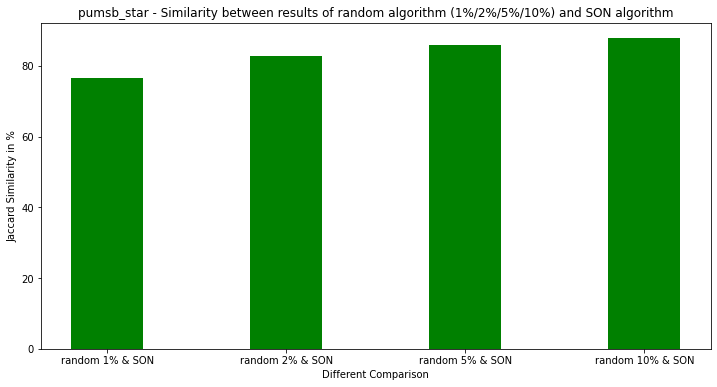

In [34]:
text_processing = ['random 1% & SON', 'random 2% & SON', 'random 5% & SON', 'random 10% & SON']
values = [pumsb_star_similarity_matrix[0][4], pumsb_star_similarity_matrix[1][4], pumsb_star_similarity_matrix[2][4], pumsb_star_similarity_matrix[3][4]]


fig = plt.figure(figsize = (12, 6))
 
# Create the bar plot
plt.bar(text_processing, values, color ='green',
        width = 0.4)

plt.xlabel("Different Comparison")
plt.ylabel("Jaccard Similarity in %")
plt.title("pumsb_star - Similarity between results of random algorithm (1%/2%/5%/10%) and SON algorithm")
plt.show()